In [9]:
import scanpy as sc
import anndata as ad
import numpy as np
import matplotlib.pyplot as pl
import pandas as pd
import bbknn
import pooch

from pathlib import Path

/root/miniconda/envs/unified_env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
if Path("cache/adata_concat.h5ad").exists():
    adata_concat = sc.read_h5ad("cache/adata_concat.h5ad")

In [3]:
sc.tl.pca(adata_concat)

In [11]:
sc.external.pp.bbknn(adata_concat, batch_key="batch")

## bbknn (batch-balanced knn)은 sc.pp.neighbors()의 대안이다. 
## 각 batch에서 knn을 하고, 통합하는 식?

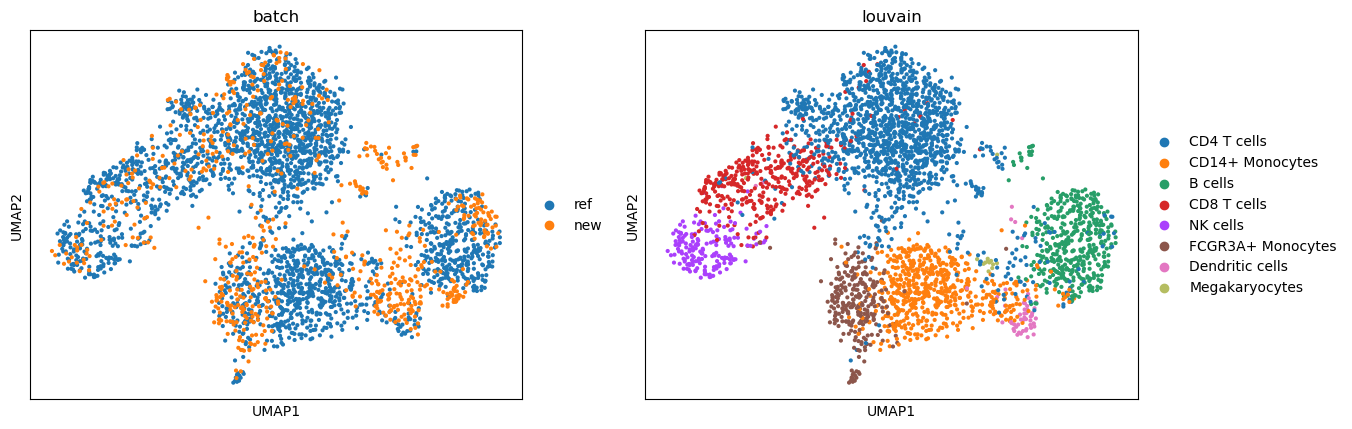

In [13]:
sc.tl.umap(adata_concat)
sc.pl.umap(adata_concat, color=["batch", "louvain"])

# 돌렸더니 dentritic cell 제외 batch effect 거의 사라짐

In [14]:
adata_concat.write("cache/adata_concat.h5ad")